### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
data.isnull()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [9]:
data[['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']]

,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,NaN,never,never,NaN,4~8,1~3
1,NaN,never,never,NaN,4~8,1~3
2,NaN,never,never,NaN,4~8,1~3
3,NaN,never,never,NaN,4~8,1~3
4,NaN,never,never,NaN,4~8,1~3
...,...,...,...,...,...,...
12679,NaN,never,never,1~3,4~8,1~3
12680,NaN,never,never,1~3,4~8,1~3
12681,NaN,never,never,1~3,4~8,1~3
12682,NaN,never,never,1~3,4~8,1~3


#### Identifying misssing data
After my initial exploration, I see 'car' column has 12576 missing rows whereas there are in total 12684 rows. There are other other columns too which has missing rows, but, are relatively small number.

3. Decide what to do about your missing data -- drop, replace, other...

#### Missing data imputation
After analysis, I decided to drop 'car' table as there are not enough records to study Car drivers behaviour and will drop the rows with missing records for other columns - 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20' and 'Restaurant20To50'.

In [10]:
data.car.unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [12]:
data.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [37]:
upt_data = data.drop(columns = ['car'])
upt_data = upt_data.dropna()
upt_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [38]:
upt_data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [39]:
upt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

4. What proportion of the total observations chose to accept the coupon? 



In [44]:
acceptance_df = upt_data.groupby('Y')['destination'].count()
acceptance_df = acceptance_df.reset_index().rename(columns={'Y':'accepted_coupon', 'destination' : 'Total'})
acceptance_df

,accepted_coupon,Total
0,0,5202
1,1,6877


In [49]:
acceptance_proportion =  acceptance_df[acceptance_df['accepted_coupon'] == 1]['Total'] / acceptance_df['Total'].sum()
acceptance_proportion

1    0.569335
Name: Total, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

We see that customers' coupon acceptance rate is higher than rejection.

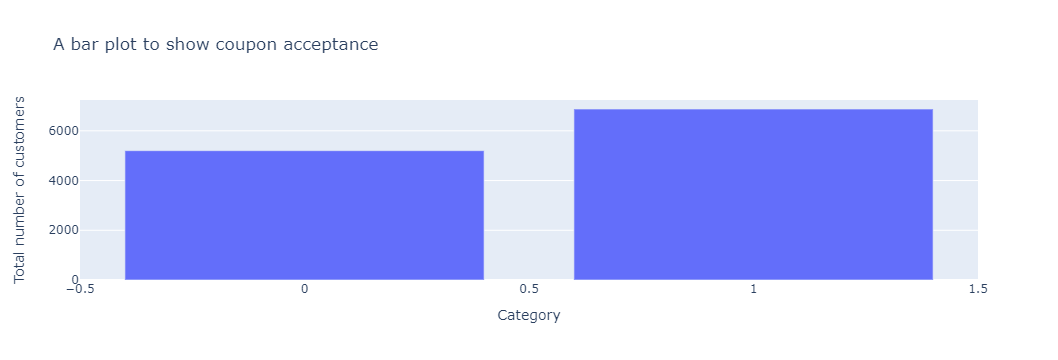

In [54]:
import plotly.express as px
fig = px.bar(
    acceptance_df
    , y='Total'
    , title="A bar plot to show coupon acceptance"
    , labels={'Total':'Total number of customers', 'index' : 'Category'}
)
fig.show()

6. Use a histogram to visualize the temperature column.

We can see there are three buckets with respect to `temperature` related data and have most records for temperature 80F whereas least are for 30F.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

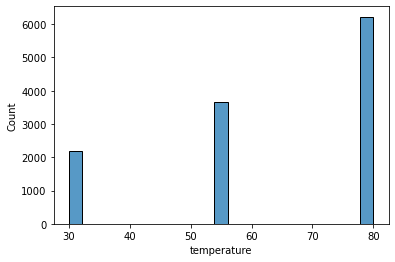

In [59]:
import seaborn as sns
sns.histplot(data = upt_data, x = 'temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [166]:
bar_df = upt_data.query("coupon == 'Bar'")
bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?

Looks like less than 50% of Bar coupons were accepted


In [160]:
bar_acceptance_prop = None

bar_accptance_df = bar_df.groupby('Y').count().reset_index()
# print(bar_accptance_df)
bar_acceptance_prop = bar_accptance_df[bar_accptance_df['Y'] == 1]['coupon'] / bar_accptance_df['coupon'].sum()
print(f"Proportion of bar coupons were accepted: {bar_acceptance_prop}")

Proportion of bar coupons were accepted: 1    0.411918
Name: coupon, dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

Based on below analysis we can see that the acceptance rate for those who went to a bar more often is higher than those who went to a bar 3 or fewer times a month.


In [164]:
bar_3_or_less = bar_df.loc[bar_df['Bar'].isin(['less1', '1~3'])].groupby('Y').count().reset_index()
bar_acceptance_prop_1 = bar_3_or_less[bar_3_or_less['Y'] == 1]['coupon'] / bar_3_or_less['coupon'].sum()
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {bar_acceptance_prop_1}")

Acceptance rate for those who went to a bar 3 or fewer times a month: 1    0.527897
Name: coupon, dtype: float64


In [165]:
bar_more = bar_df.loc[bar_df['Bar'].isin(['gt8', '4~8'])].groupby('Y').count().reset_index()
bar_acceptance_prop_2 = bar_more[bar_more['Y'] == 1]['coupon'] / bar_more['coupon'].sum()
print(f"Acceptance rate for those who went to a bar more often: {bar_acceptance_prop_2}")

Acceptance rate for those who went to a bar more often: 1    0.761658
Name: coupon, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [167]:
# those who go to a bar more than once a month
age_over_25 = ['26', '31', '50plus', '41', '36', '46']
bar_more_than_once_over_25 = bar_df\
    .loc[bar_df['Bar'].isin(['1~3', 'gt8', '4~8'])]\
    .query("age == @age_over_25")\
    .groupby('Y').count().reset_index()

bar_more_than_once_over_25.head()

,Y,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,0,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125
1,1,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278


In [168]:
# comparison of acceptance
bar_acceptance = bar_more_than_once_over_25[bar_more_than_once_over_25['Y'] == 1]['coupon'] / bar_accptance_df[bar_accptance_df['Y'] == 1]['coupon']
print(f"the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others: {bar_acceptance[1]}")

the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others: 0.35279187817258884


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [171]:
list_of_occupation = ['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance']

bar_no_kids = bar_df\
            .loc[(bar_df['Bar'].isin(['1~3', 'gt8', '4~8']))]\
            .query("passanger != 'Kid(s)'")\
            .groupby('Y').count().reset_index()

print("Drivers who go to bars more than once a month and had passengers that were not a kid:")
print(bar_no_kids.head())


bar_with_occ = bar_df\
            .query("occupation == @list_of_occupation")\
            .groupby('Y').count().reset_index()
print("Drivers who had occupations other than farming, fishing, or forestry:")
print(bar_with_occ.head())


# comparison of acceptance
bar_occ_acceptance = bar_no_kids[bar_no_kids['Y'] == 1]['coupon'] / bar_with_occ[bar_with_occ['Y'] == 1]['coupon']
print(f"the acceptance rate between drivers who go to bars more than \
once a month and had passengers that were not a kid and had \
occupations other than farming, fishing, or forestry: {bar_occ_acceptance[1]}")



Drivers who go to bars more than once a month and had passengers that were not a kid:
   Y  destination  passanger  weather  temperature  time  coupon  expiration  \
0  0          154        154      154          154   154     154         154   
1  1          376        376      376          376   376     376         376   

   gender  age  maritalStatus  has_children  education  occupation  income  \
0     154  154            154           154        154         154     154   
1     376  376            376           376        376         376     376   

   Bar  CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50  \
0  154          154        154                   154               154   
1  376          376        376                   376               376   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0               154                154                154             154   
1               376                376                376    

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [176]:
# bar_df4 = upt_data[['passanger', 'Bar', 'Y', 'maritalStatus', 'age', 'RestaurantLessThan20', 'income']]
# # print(bar_df4.head())

print("**********************")
print("Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:")
bar1 = bar_df\
    .loc[(bar_df['Bar'].isin(['1~3', 'gt8', '4~8']))]\
    .query("passanger != 'Kid(s)'")\
    .query("maritalStatus != 'Widowed'")\
    .groupby('Y').count().reset_index()
print(bar1.head())

print("**********************")
print("Drivers who go to bars more than once a month and are under the age of 30:")
age_under_30 = ['21', '26', 'below21']
bar2 = bar_df\
    .loc[(bar_df['Bar'].isin(['1~3', 'gt8', '4~8']))]\
    .query("age == @age_under_30")\
    .groupby('Y').count().reset_index()
print(bar2.head())

print("**********************")
print("Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:")
income_under_50k = ['$12500 - $24999', '$37500 - $49999', '$25000 - $37499', 'Less than $12500']
bar3 = bar_df\
    .loc[(bar_df['RestaurantLessThan20'].isin(['4~8', 'gt8']))]\
    .query("income == @income_under_50k")\
    .groupby('Y').count().reset_index()
print(bar3.head())


# comparison of acceptance
print("**********************")
bar_accept1 = bar1[bar1['Y'] == 1]['coupon'] / bar2[bar2['Y'] == 1]['coupon']
print(f"The acceptance rate between - \
'Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed'\
and 'Drivers who go to bars more than once a month and are under the age of 30' is : {bar_accept1[1]}")

print("**********************")
bar_accept2 =  bar2[bar2['Y'] == 1]['coupon'] / bar3[bar3['Y'] == 1]['coupon']
print(f"The acceptance rate between - \
'Drivers who go to bars more than once a month and are under the age of 30' \
and 'Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K' \
is : {bar_accept2[1]}")

print("**********************")
bar_accept3 = bar1[bar1['Y'] == 1]['coupon'] / bar3[bar3['Y'] == 1]['coupon']
print(f"The acceptance rate between - \
'Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed'\
and 'Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K' is : {bar_accept3[1]}")

**********************
Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:
   Y  destination  passanger  weather  temperature  time  coupon  expiration  \
0  0          154        154      154          154   154     154         154   
1  1          376        376      376          376   376     376         376   

   gender  age  maritalStatus  has_children  education  occupation  income  \
0     154  154            154           154        154         154     154   
1     376  376            376           376        376         376     376   

   Bar  CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50  \
0  154          154        154                   154               154   
1  376          376        376                   376               376   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0               154                154                154             154   
1               376

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed seems to accept coupon often.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [155]:
upt_data.coupon.unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

**Investigating the Coffee House Coupons**

Exploring Coffee House related coupons.  

1. Create a new `DataFrame` that contains just the Coffee House coupons.


In [178]:
ch_df = upt_data.query("coupon == 'Coffee House'")
ch_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0


2. What proportion of the coupons were accepted?

Looks like 49% of coffee house coupons were accepted which is more than acceptance rate of Bar coupon


In [179]:
ch_accptance_df = ch_df.groupby('Y').count().reset_index()
ch_accptance_df

,Y,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,0,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922,1922
1,1,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894


In [181]:
ch_acceptance_prop = ch_accptance_df[ch_accptance_df['Y'] == 1]['coupon'] / ch_accptance_df['coupon'].sum()
print(f"Proportion of coffee house coupons were accepted: {ch_acceptance_prop}")

Proportion of coffee house coupons were accepted: 1    0.496331
Name: coupon, dtype: float64


3. Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

Based on below analysis we can see that the acceptance rate for those who went to a coffe house more often is higher than those who went 3 or fewer times a month. This behaviour is similar to Bar coupon.


In [183]:
ch_3_or_less = ch_df.loc[ch_df['CoffeeHouse'].isin(['less1', '1~3'])].groupby('Y').count().reset_index()
ch_acceptance_prop_1 = ch_3_or_less[ch_3_or_less['Y'] == 1]['coupon'] / ch_3_or_less['coupon'].sum()
print(f"Acceptance rate for those who went to a coffee house 3 or fewer times a month: {ch_acceptance_prop_1}")

Acceptance rate for those who went to a coffee house 3 or fewer times a month: 1    0.563013
Name: coupon, dtype: float64


In [184]:
ch_more = ch_df.loc[ch_df['CoffeeHouse'].isin(['gt8', '4~8'])].groupby('Y').count().reset_index()
ch_acceptance_prop_2 = ch_more[ch_more['Y'] == 1]['coupon'] / ch_more['coupon'].sum()
print(f"Acceptance rate for those who went to a coffee house more often: {ch_acceptance_prop_2}")

Acceptance rate for those who went to a coffee house more often: 1    0.672556
Name: coupon, dtype: float64


4. Compare the acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 to the all others.  Is there a difference?

Surprisingly, for Coffee House data the acceptance rate for both group is same.

In [191]:
# those who go to a CH more than once a month
age_over_25 = ['26', '31', '50plus', '41', '36', '46']
ch_more_than_once_over_25 = ch_df\
    .loc[ch_df['CoffeeHouse'].isin(['1~3', 'gt8', '4~8'])]\
    .query("age == @age_over_25")\
    .groupby('Y').count().reset_index()

ch_more_than_once_over_25.head()

,Y,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,0,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483
1,1,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857


In [186]:
# comparison of acceptance
ch_acceptance = ch_more_than_once_over_25[ch_more_than_once_over_25['Y'] == 1]['coupon'] / ch_more_than_once_over_25[ch_more_than_once_over_25['Y'] == 1]['coupon']
print(f"the acceptance rate between drivers who go to a CH more than once a month and are over the age of 25 to the all others: {ch_acceptance[1]}")

the acceptance rate between drivers who go to a CH more than once a month and are over the age of 25 to the all others: 1.0


5. Use the same process to compare the acceptance rate between drivers who go to coffee house more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [190]:
list_of_occupation = ['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance']

ch_no_kids = ch_df\
            .loc[(ch_df['CoffeeHouse'].isin(['1~3', 'gt8', '4~8']))]\
            .query("passanger != 'Kid(s)'")\
            .groupby('Y').count().reset_index()

print("Drivers who go to coffee house more than once a month and had passengers that were not a kid:")
print(ch_no_kids.head())


ch_with_occ = ch_df\
            .query("occupation == @list_of_occupation")\
            .groupby('Y').count().reset_index()
print("Drivers who had occupations other than farming, fishing, or forestry:")
print(ch_with_occ.head())


# comparison of acceptance
ch_occ_acceptance = ch_no_kids[ch_no_kids['Y'] == 1]['coupon'] / ch_with_occ[ch_with_occ['Y'] == 1]['coupon']
print(f"the acceptance rate between drivers who go to coffee house more than \
once a month and had passengers that were not a kid and had \
occupations other than farming, fishing, or forestry: {ch_occ_acceptance[1]}")



Drivers who go to coffee house more than once a month and had passengers that were not a kid:
   Y  destination  passanger  weather  temperature  time  coupon  expiration  \
0  0          600        600      600          600   600     600         600   
1  1         1163       1163     1163         1163  1163    1163        1163   

   gender   age  maritalStatus  has_children  education  occupation  income  \
0     600   600            600           600        600         600     600   
1    1163  1163           1163          1163       1163        1163    1163   

    Bar  CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50  \
0   600          600        600                   600               600   
1  1163         1163       1163                  1163              1163   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0               600                600                600             600   
1              1163               1163         

6. Compare the acceptance rates between those drivers who:

- go to coffee house more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to coffee house more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [189]:
print("**********************")
print("Drivers who go to coffee house more than once a month, had passengers that were not a kid, and were not widowed:")
ch1 = ch_df\
    .loc[(ch_df['CoffeeHouse'].isin(['1~3', 'gt8', '4~8']))]\
    .query("passanger != 'Kid(s)'")\
    .query("maritalStatus != 'Widowed'")\
    .groupby('Y').count().reset_index()
print(ch1.head())

print("**********************")
print("Drivers who go to coffee house more than once a month and are under the age of 30:")
age_under_30 = ['21', '26', 'below21']
ch2 = ch_df\
    .loc[(ch_df['CoffeeHouse'].isin(['1~3', 'gt8', '4~8']))]\
    .query("age == @age_under_30")\
    .groupby('Y').count().reset_index()
print(ch2.head())

print("**********************")
print("Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:")
income_under_50k = ['$12500 - $24999', '$37500 - $49999', '$25000 - $37499', 'Less than $12500']
ch3 = ch_df\
    .loc[(ch_df['RestaurantLessThan20'].isin(['4~8', 'gt8']))]\
    .query("income == @income_under_50k")\
    .groupby('Y').count().reset_index()
print(ch3.head())


# comparison of acceptance
print("**********************")
ch_accept1 = ch1[ch1['Y'] == 1]['coupon'] / ch2[ch2['Y'] == 1]['coupon']
print(f"The acceptance rate between - \
'Drivers who go to coffee house more than once a month, had passengers that were not a kid, and were not widowed'\
and 'Drivers who go to coffee house more than once a month and are under the age of 30' is : {ch_accept1[1]}")

print("**********************")
ch_accept2 =  ch2[ch2['Y'] == 1]['coupon'] / ch3[ch3['Y'] == 1]['coupon']
print(f"The acceptance rate between - \
'Drivers who go to coffee house more than once a month and are under the age of 30' \
and 'Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K' \
is : {ch_accept2[1]}")

print("**********************")
ch_accept3 = ch1[ch1['Y'] == 1]['coupon'] / ch3[ch3['Y'] == 1]['coupon']
print(f"The acceptance rate between - \
'Drivers who go to coffee house more than once a month, had passengers that were not a kid, and were not widowed'\
and 'Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K' is : {ch_accept3[1]}")

**********************
Drivers who go to coffee house more than once a month, had passengers that were not a kid, and were not widowed:
   Y  destination  passanger  weather  temperature  time  coupon  expiration  \
0  0          600        600      600          600   600     600         600   
1  1         1163       1163     1163         1163  1163    1163        1163   

   gender   age  maritalStatus  has_children  education  occupation  income  \
0     600   600            600           600        600         600     600   
1    1163  1163           1163          1163       1163        1163    1163   

    Bar  CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50  \
0   600          600        600                   600               600   
1  1163         1163       1163                  1163              1163   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0               600                600                600             600   
1    

7.  Based on these observations, what do you hypothesize about drivers who accepted the coffee house coupons?

The drivers who go to coffee house more than once a month, had passengers that were not a kid, and were not widowed seems to accept coupon often.